In [1]:
# %pip install matplotlib
# %pip install --upgrade pip
# %pip install plotly==4.14.3
# %pip install xgboost
# %pip install --upgrade scikit-learn
# %pip install nbformat --upgrade
# %pip install ipython
# %pip install Flask --upgrade
# !pip install -U flask-cors

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
import sklearn
from sklearn import metrics
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.metrics import brier_score_loss
import plotly.graph_objects as go
from flask import Flask, request, jsonify
from flask_cors import CORS


# Assuming 'credit_risk_datasetlms.csv' is your dataset file


In [3]:
data = pd.read_csv('../dataset/credit_risk_dataset.csv')  #read data
print(data.isnull().sum())
data = data.dropna(axis=0)  # drop null
data.describe() #view data

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Selecting columns for the scatter matrix


In [4]:
scatter_columns = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate"]

In [5]:
set(data['loan_intent'])

{'DEBTCONSOLIDATION',
 'EDUCATION',
 'HOMEIMPROVEMENT',
 'MEDICAL',
 'PERSONAL',
 'VENTURE'}

# Creating a scatter matrix using Pandas plotting capabilities


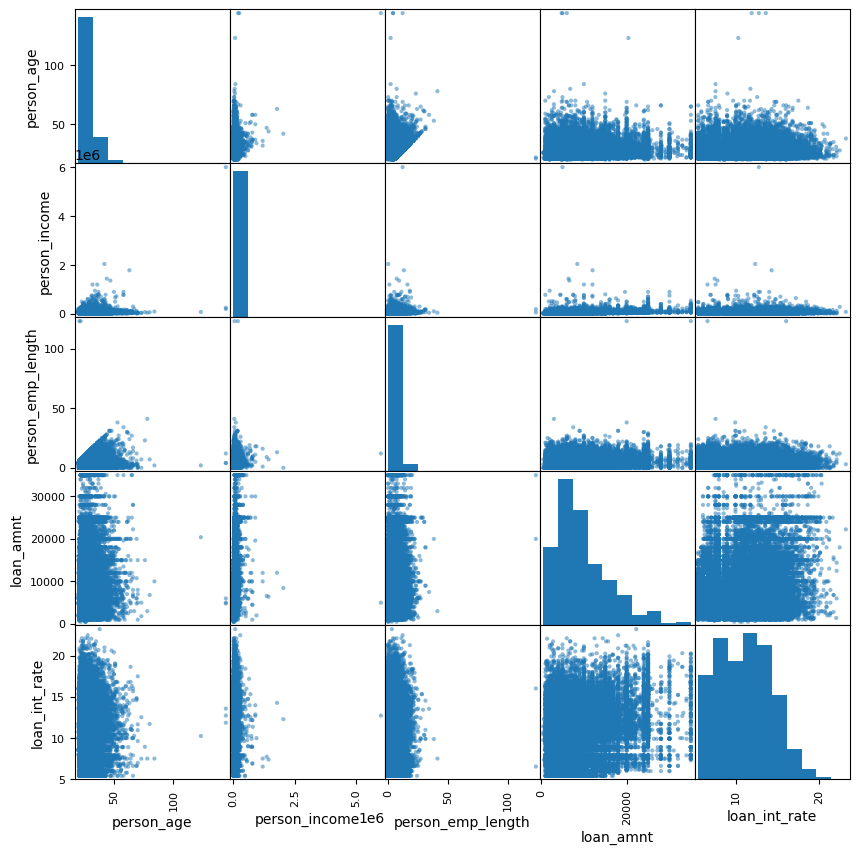

In [6]:
pd.plotting.scatter_matrix(data[scatter_columns], figsize=(10,10))
plt.show()

# Convert categorical columns to strings


In [7]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    data[col] = data[col].astype(str)

# Create dimensions for parallel categories plot


In [8]:
dimensions = []
for col in categorical_cols:
    dimensions.append(
        dict(
            label=col.replace('_', ' '), values=data[col]
        )
    )


# Create the parallel categories plot using Plotly Graph Objects


In [9]:
fig = go.Figure(data=
    go.Parcats(
        line=dict(color=data['loan_status'], colorscale='RdBu', showscale=True),
        dimensions=dimensions
    )
)

# fig.show()

In [10]:
# fig

# One-hot encoding of categorical variables


In [11]:
df = pd.get_dummies(data=data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Train and test split

In [12]:
Y = df['loan_status']
X = df.drop('loan_status', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20)
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,0.57,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,True,False,False,...,False,False,False,True,False,False,False,False,True,False
32577,54,120000,4.0,17625,7.49,0.15,19,True,False,False,...,False,True,False,False,False,False,False,False,True,False
32578,65,76000,3.0,35000,10.99,0.46,28,False,False,False,...,False,False,True,False,False,False,False,False,True,False
32579,56,150000,5.0,15000,11.48,0.10,26,True,False,False,...,False,False,True,False,False,False,False,False,True,False


# Impute missing values


In [13]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# KNN


In [14]:
knn = KNeighborsClassifier(n_neighbors=151)
knn.fit(x_train_imputed, y_train)
preds_knn = knn.predict(x_test_imputed)
proba_knn = knn.predict_proba(x_test_imputed)

# Logistic Regression

In [15]:
lg = LogisticRegression(random_state=0)
lg.fit(x_train_imputed, y_train)
preds_lg = lg.predict(x_test_imputed)
proba_lg = lg.predict_proba(x_test_imputed)

c:\Users\NarenthraKishoreRS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# XGBoost


In [16]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x_train_imputed, y_train)
preds_xgb = xgb.predict(x_test_imputed)
proba_xgb = xgb.predict_proba(x_test_imputed)

# Evaluate performance


In [17]:
print("KNN:")
print(classification_report(y_test, preds_knn))
print("\nLogistic Regression:")
print(classification_report(y_test, preds_lg))
print("\nXGBoost:")
print(classification_report(y_test, preds_xgb))
print(data.columns)
print(data.head())

KNN:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4506
           1       0.72      0.39      0.50      1222

    accuracy                           0.84      5728
   macro avg       0.79      0.67      0.70      5728
weighted avg       0.82      0.84      0.82      5728


Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4506
           1       0.62      0.39      0.48      1222

    accuracy                           0.82      5728
   macro avg       0.74      0.66      0.69      5728
weighted avg       0.80      0.82      0.80      5728


XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4506
           1       0.96      0.73      0.83      1222

    accuracy                           0.94      5728
   macro avg       0.95      0.86      0.90      5728
weighted avg       0.94      0.94    

# Assuming 'loan_status' is the target variable

In [18]:
Y = data['loan_status']
X = data.drop('loan_status', axis=1)

# Identify numeric and categorical columns


In [19]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=[object]).columns

# Impute missing values for numeric columns


In [20]:
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Impute missing values for categorical columns


In [21]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# One-hot encoding of categorical variables


In [22]:
X = pd.get_dummies(X, columns=categorical_cols)

# Train and test split


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.20)

# Get feature names


In [24]:
feature_names = X.columns

# KNN


In [25]:
knn = KNeighborsClassifier(n_neighbors=151)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=151)

# Convert input data to NumPy array before calling predict_proba


In [26]:
preds_proba_knn = knn.predict_proba(x_test.to_numpy())
probsknn = preds_proba_knn[:, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)

c:\Users\NarenthraKishoreRS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



# Plot ROC curves


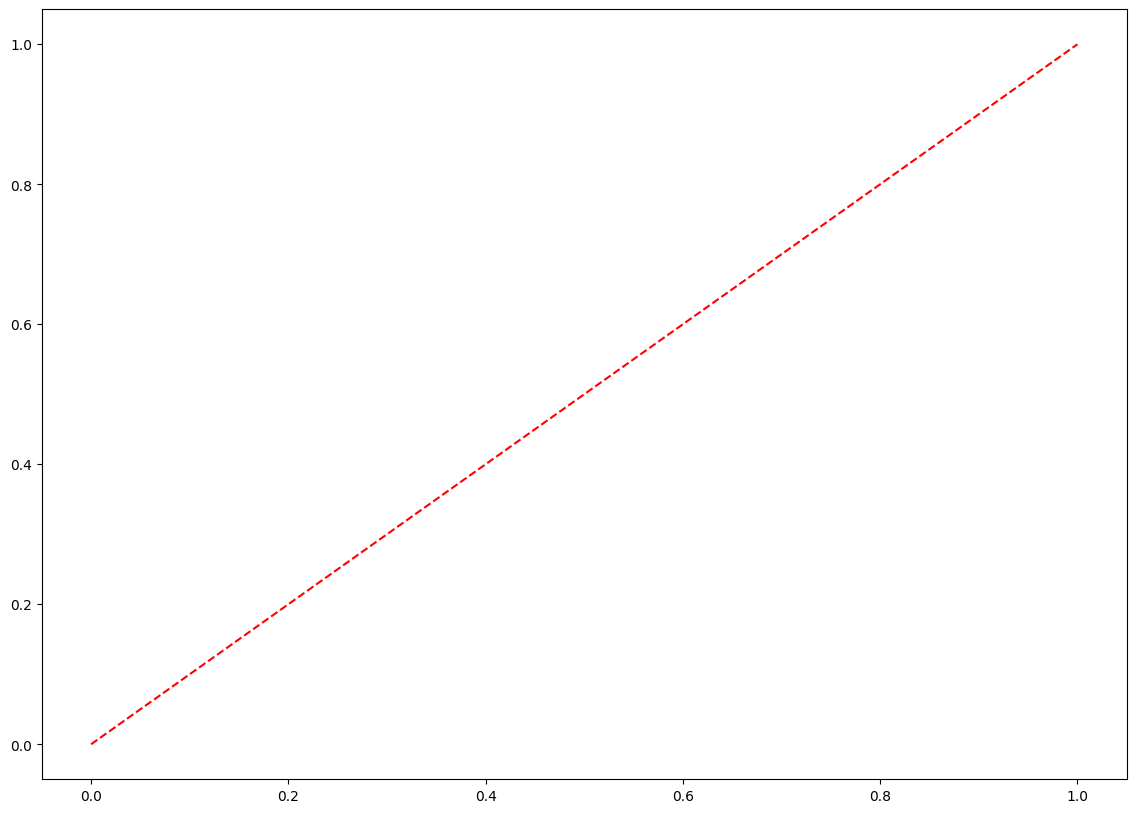

In [27]:
fig = plt.figure(figsize=(14, 10))
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line

# KNN


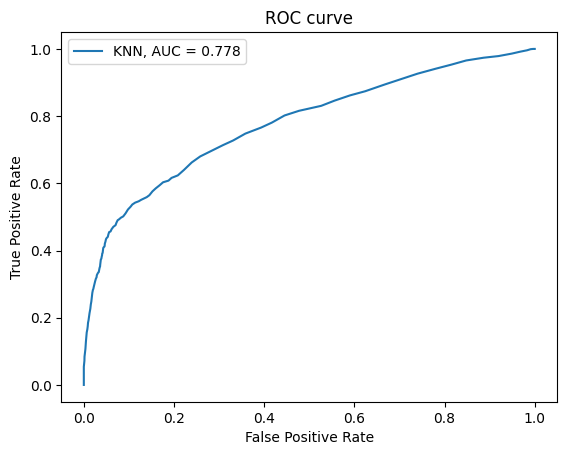

In [28]:
plt.plot(fpr_knn, tpr_knn, label=f'KNN, AUC = {str(round(aucknn, 3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

# Assuming 'loan_status' is the target variable

In [29]:
Y = data['loan_status']
X = data.drop('loan_status', axis=1)

# Identify numeric and categorical columns


In [30]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=[object]).columns

# Impute missing values for numeric columns


In [31]:
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Impute missing values for categorical columns


In [32]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# One-hot encoding of categorical variables


In [33]:
X = pd.get_dummies(X, columns=categorical_cols)


# Train and test split


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.20)


# Get feature names


In [35]:
feature_names = X.columns

# KNN


In [36]:
knn = KNeighborsClassifier(n_neighbors=151)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=151)

# Logistic Regression

In [37]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

c:\Users\NarenthraKishoreRS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# XGBoost


In [38]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Convert input data to NumPy array before calling predict_proba


In [39]:
preds_proba_knn = knn.predict_proba(x_test.to_numpy())
probsknn = preds_proba_knn[:, 1]

preds_proba_lg = lg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]

preds_proba_xgb = xgb.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]

c:\Users\NarenthraKishoreRS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



# Plot ROC curves


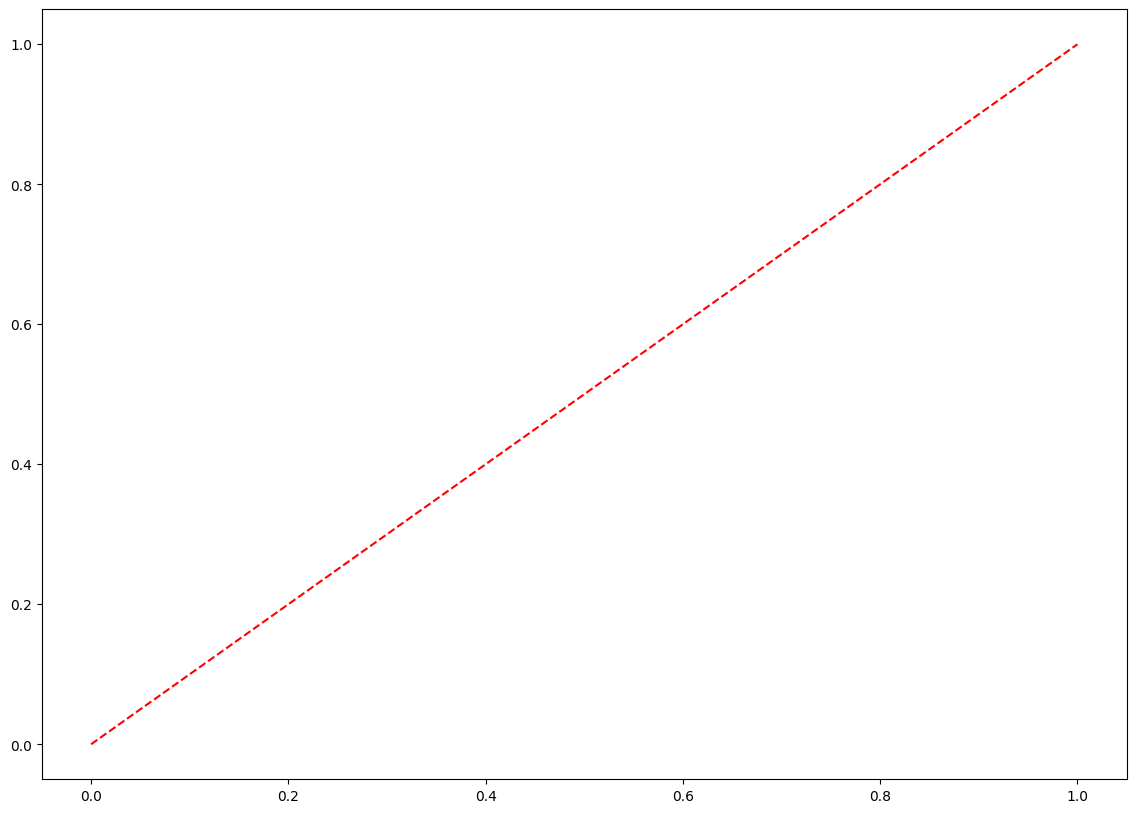

In [40]:
fig = plt.figure(figsize=(14, 10))
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line

#KNN

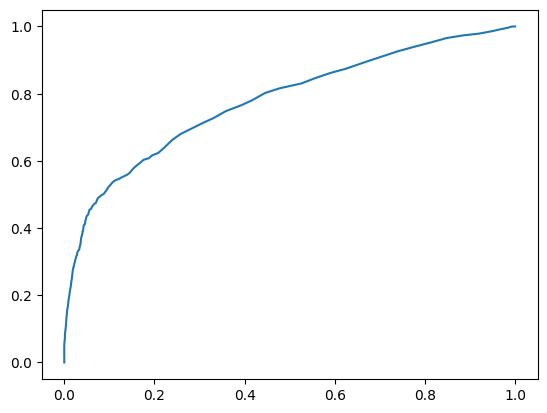

In [41]:
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN, AUC = {str(round(aucknn, 3))}')

# Logistic Regression

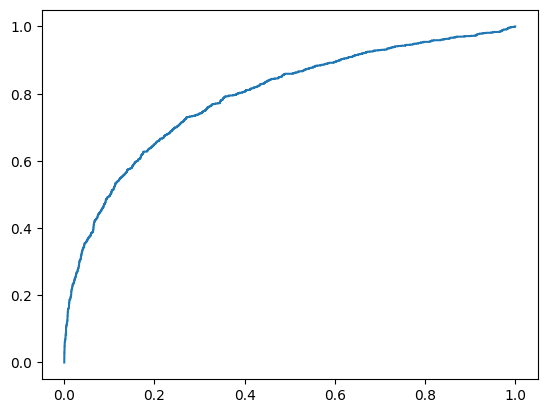

In [42]:

fpr_lg, tpr_lg, _ = metrics.roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression, AUC = {str(round(auclg, 3))}')


# XGBoost


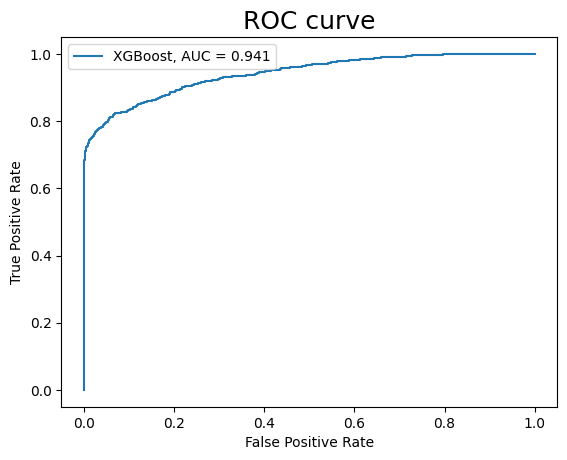

In [43]:

fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost, AUC = {str(round(aucxgb, 3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

# Reliability plot and Brier Score


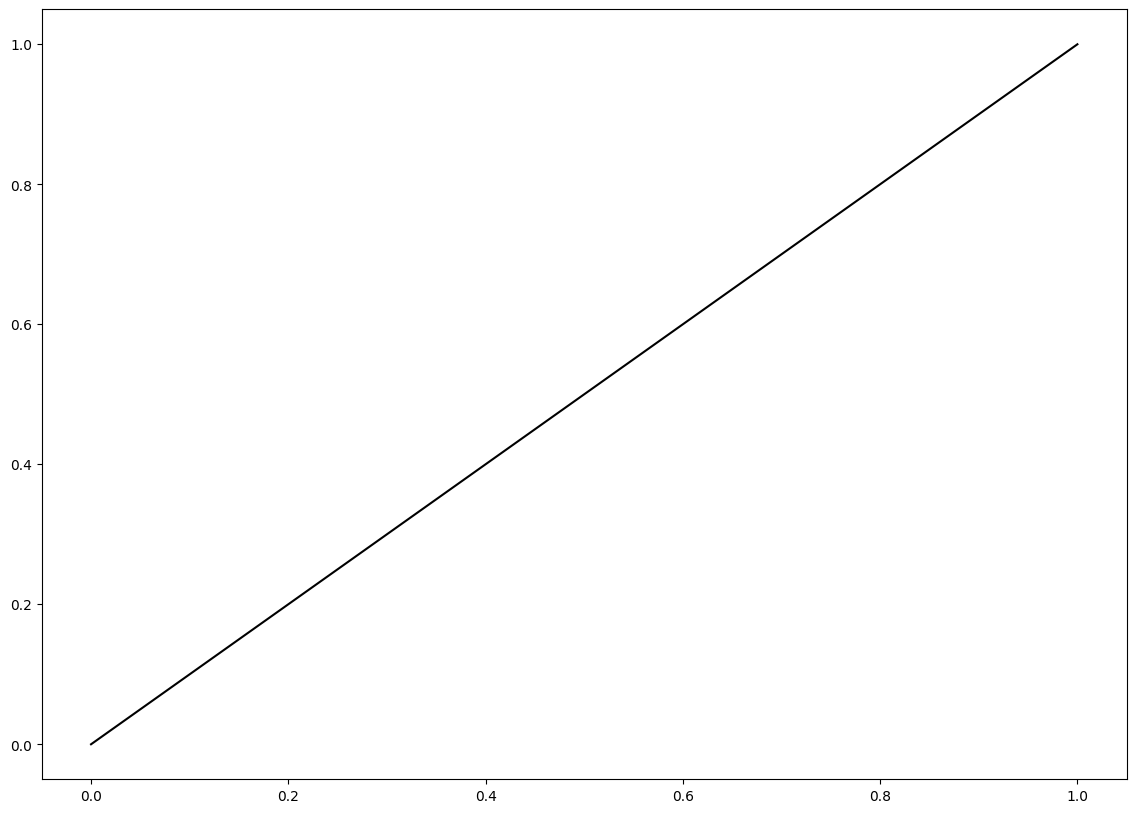

In [44]:
fig = plt.figure(figsize=(14, 10))
plt.plot([0, 1], [0, 1], color="black")  # Diagonal line

# KNN


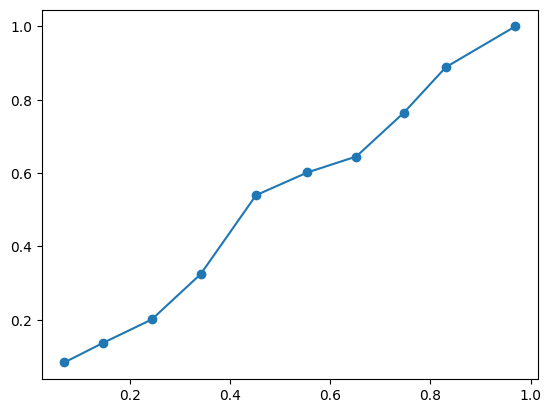

In [45]:
knn_y, knn_x = calibration_curve(y_test, probsknn, n_bins=10)
loss_knn = brier_score_loss(y_test, probsknn)
plt.plot(knn_x, knn_y, marker='o', label=f'KNN, Brier score = {str(round(loss_knn, 3))}')

# Logistic Regression


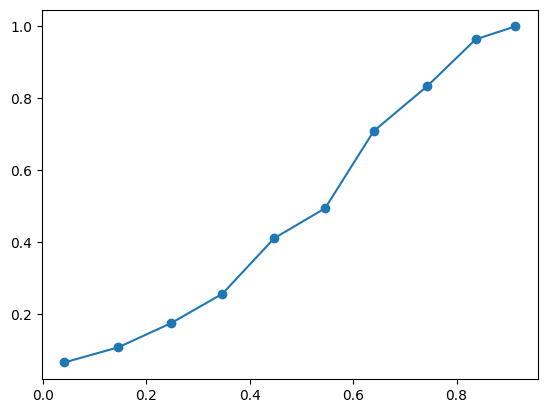

In [46]:
lg_y, lg_x = calibration_curve(y_test, probslg, n_bins=10)
loss_lg = brier_score_loss(y_test, probslg)
plt.plot(lg_x, lg_y, marker='o', label=f'Logistic Regression, Brier score = {str(round(loss_lg, 3))}')


# XGBoost


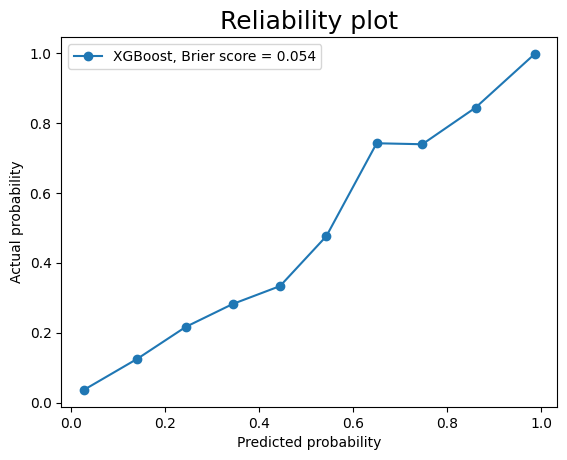

In [47]:

xgb_y, xgb_x = calibration_curve(y_test, probsxgb, n_bins=10)
loss_xgb = brier_score_loss(y_test, probsxgb)
plt.plot(xgb_x, xgb_y, marker='o', label=f'XGBoost, Brier score = {str(round(loss_xgb, 3))}')

plt.ylabel("Actual probability")
plt.xlabel("Predicted probability")
plt.title("Reliability plot")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

In [48]:
loss_xgb

0.05350867608783028

# Assuming xgb is your XGBoost model


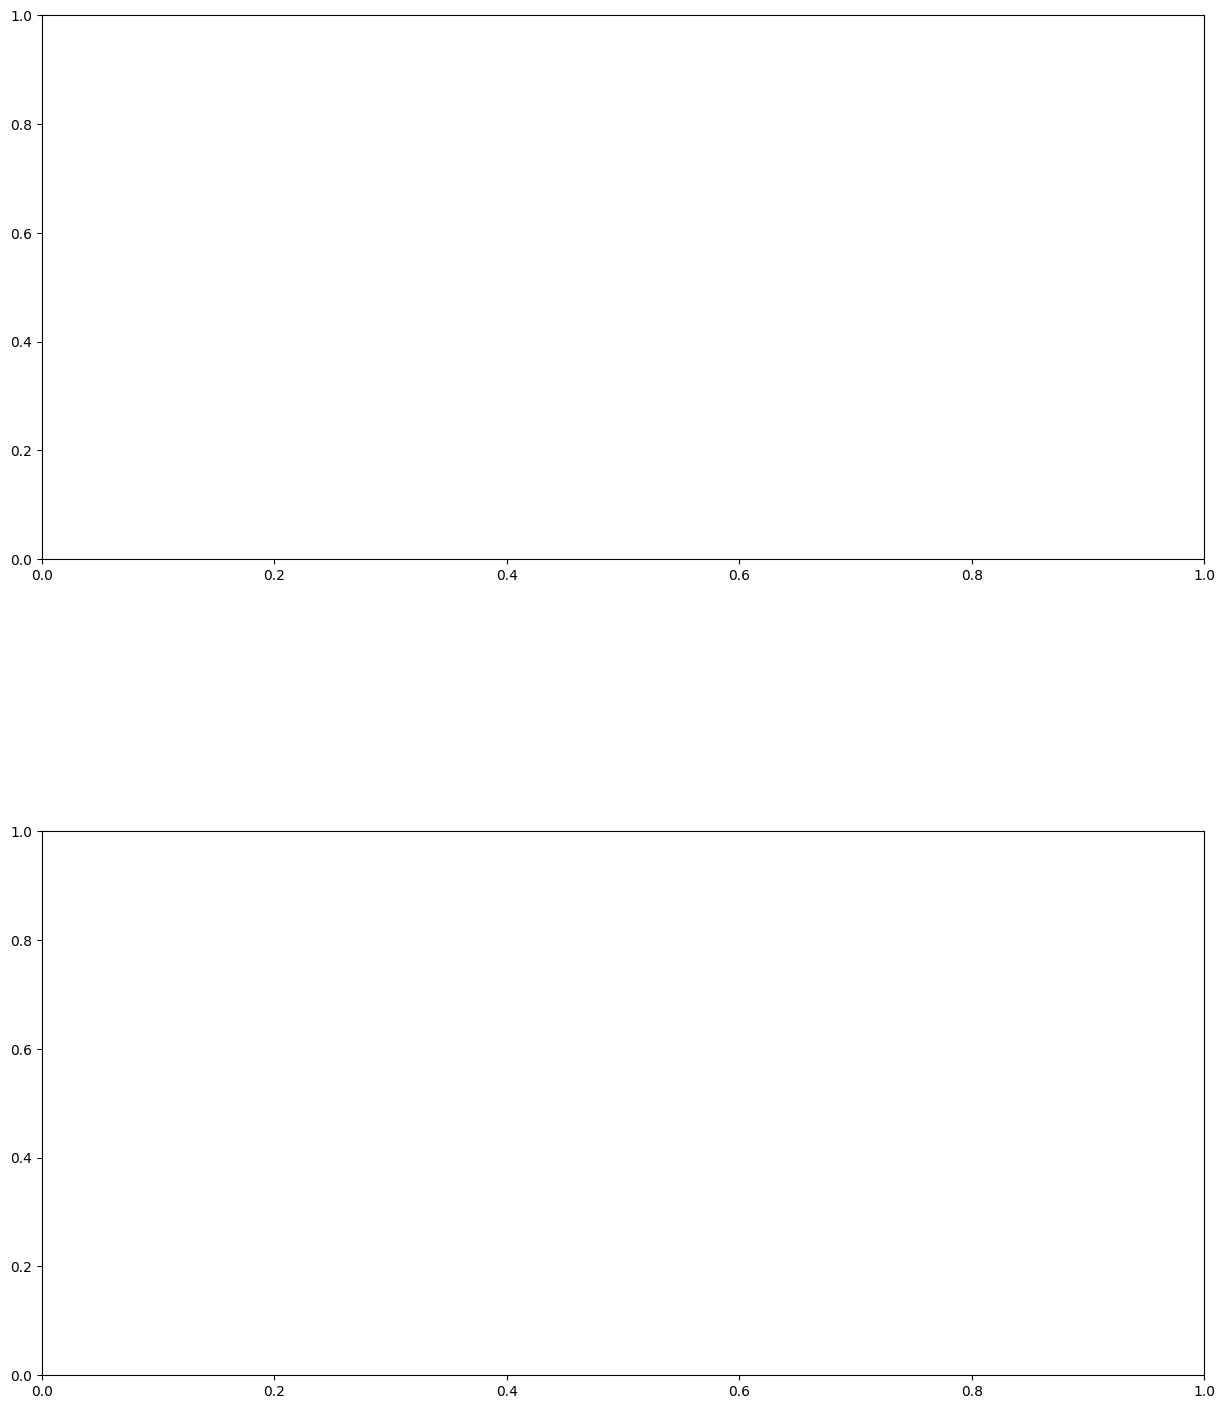

In [49]:
fig, (ax1, ax2) = plt.subplots(figsize=(15, 17), ncols=1, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0, hspace=0.5)

# Assuming xgb is your XGBoost model


In [50]:
plot_importance(xgb, importance_type='gain', ax=ax1)
ax1.set_title('Feature Importance by Information Gain', fontsize=18)
ax1.set_xlabel('Gain')

plt.show()

In [51]:
plt.show()

Naren's touch

In [52]:
def predict_approval(user_input):

    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])

    # Convert categorical columns to strings
    for col in categorical_cols:
        user_df[col] = user_df[col].astype(str)

    # One-hot encode categorical variables
    user_df = pd.get_dummies(data=user_df, columns=categorical_cols)

    # Ensure the input features match the model's training features
    user_df = user_df.reindex(columns=feature_names, fill_value=0)

    # Impute missing values for numeric columns
    user_df[numeric_cols] = numeric_imputer.transform(user_df[numeric_cols])

    # Make prediction using the XGBoost model
    user_pred_proba = xgb.predict_proba(user_df)[:, 1]

    # Display the predicted probability
    # print("Predicted Probability of Default:", user_pred_proba)
    return user_pred_proba


In [53]:
user_input = {}
# user_input['person_age'] = float(input("Enter person's age: "))
# user_input['person_income'] = float(input("Enter person's income: "))
# user_input['person_emp_length'] = float(input("Enter person's employment length: "))
# user_input['loan_amnt'] = float(input("Enter loan amount: "))
# user_input['loan_int_rate'] = float(input("Enter loan interest rate: "))
# user_input['person_home_ownership'] = input("Enter person's home ownership status: ")
# user_input['loan_intent'] = input("Enter loan intent: ")
# user_input['loan_grade'] = input("Enter loan grade: ")
# user_input['cb_person_default_on_file'] = input("Enter default history: ")

user_input['person_home_ownership'] = "RENT"
user_input['loan_intent'] = "PERSONAL"
user_input['loan_grade'] = "D"
user_input['cb_person_default_on_file'] = "Y" # output is Loan Approved
user_input['person_age'] = 22
user_input['person_income'] =59000
user_input['person_emp_length'] = 123
user_input['loan_amnt'] = 35000
user_input['loan_int_rate'] = 17


In [54]:
user_pred_proba = int(predict_approval(user_input)[0]*100)
user_pred_proba

70

In [56]:
app = Flask(__name__)

CORS(app)

@app.route('/api/predict', methods=['POST'])
def your_endpoint_handler():
    # Check if the request contains JSON data
    if request.is_json:
        # Get the JSON data from the request
        request_data = request.get_json()
        user_input = {} 
        user_input['person_age'] = request_data['person_age']
        user_input['person_income'] = request_data['person_income']
        user_input['person_emp_length'] = request_data['person_emp_length']
        user_input['loan_amnt'] = request_data['loan_amnt']
        user_input['loan_int_rate'] = request_data['loan_int_rate']
        user_input['person_home_ownership'] = request_data['person_home_ownership']
        user_input['loan_intent'] = request_data['loan_intent']
        user_input['loan_grade'] = request_data['loan_grade']
        user_input['cb_person_default_on_file'] = request_data['cb_person_default_on_file']
        user_pred_proba = int(predict_approval(user_input)[0]*100)
        return jsonify({'predictedValue': user_pred_proba}), 200
    else:
        return jsonify({'error': 'Request must be in JSON format'}), 400
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


127.0.0.1 - - [23/Feb/2024 19:12:54] "OPTIONS /api/predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Feb/2024 19:12:54] "POST /api/predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Feb/2024 19:16:36] "OPTIONS /api/predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Feb/2024 19:16:36] "POST /api/predict HTTP/1.1" 200 -


In [ ]:
def factorial(n):
    if(n==0):
        return 1
    else :
        return n*factorial(n-1)
n=str(factorial(int(input())))[::-1]
res = 0
for i in n:
    if int(i)==0:
        res=res+1
    else:
        break
print(res)

2
